<a href="https://colab.research.google.com/github/sumaiyaanjum/wine-quality-prediction/blob/main/wineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import warnings # to ignore the warnings
warnings.filterwarnings('ignore')

In [ ]:
red_wine_data = pd.read_csv('https://raw.githubusercontent.com/btkhimsar/DataSets/master/winequality-red.csv',sep=";")

In [ ]:
# Gives first five observations
red_wine_data.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# gives last five observations
red_wine_data.tail() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# find out total number of rows and columns in dataset
red_wine_data.shape

(1599, 12)

In [ ]:
 # getting various summary statistics. 
 # This function returns the count, mean, standard deviation, 
 # minimum and maximum values and the quantiles of the data.
 red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# column names in the dataset
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Unique Values of Quality(Target Variable)
red_wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
red_wine_data['quality'].nunique()

6

In [ ]:
# counts the accurance of value in the column
red_wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:






























































































































































































































































































































































































































# rename the column name 
red_wine_data.rename(columns = {'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
      'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide',})

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# .isna() or .isnull() returns the dataframe with boolean values indicating missing values.
red_wine_data.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# .isna().sum() returns the number of missing values in each column.
red_wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# .info returns information about the data frame including the
# data types of each column, number of null values in each
# column and memory usage of the entire data.
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
duplicate = red_wine_data[red_wine_data.duplicated()]
duplicate.shape

(240, 12)

Data visualization and graphical representation


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
y = red_wine_data['quality']
X = red_wine_data.drop(red_wine_data['quality'],inplace= True)


x contains all the features except quality

y contains quality

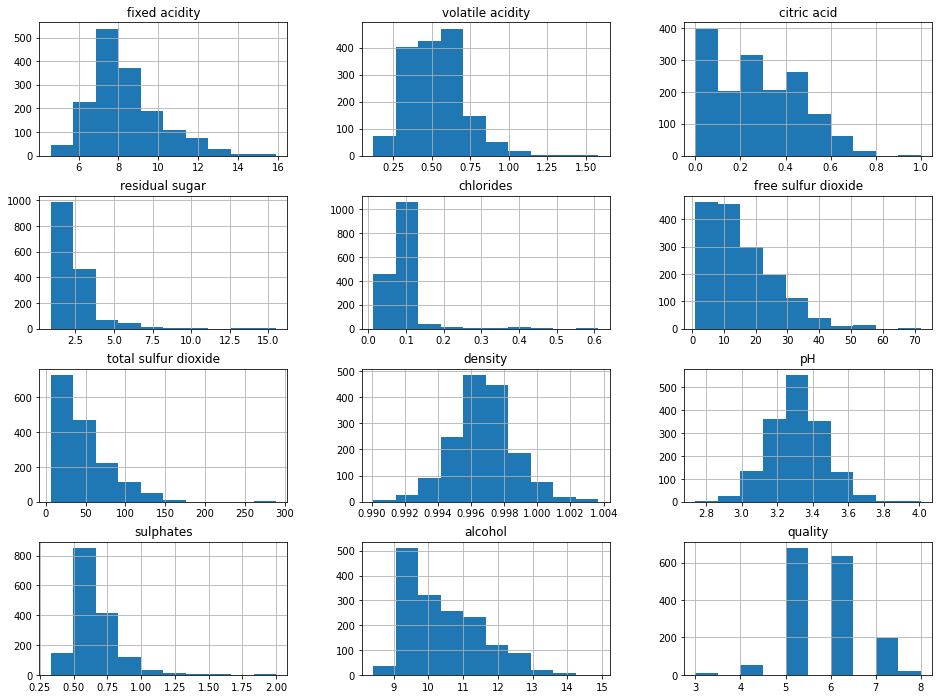

In [ ]:
# plotting histograms of all the features
red_wine_data.hist(bins=10,figsize=(16,12))
plt.show()

In [ ]:
red_wine_data.corr()
#can check each feature is related to each other using corr() function

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.254398,0.671410,0.114616,0.093650,-0.154536,-0.114387,0.668582,-0.682678,0.182851,-0.062303,0.124330
volatile acidity,-0.254398,1.000000,-0.551206,0.002691,0.061790,-0.009841,0.077683,0.022580,0.233098,-0.260545,-0.201714,-0.391616
citric acid,0.671410,-0.551206,1.000000,0.142135,0.203428,-0.062613,0.033668,0.365729,-0.540720,0.311429,0.107572,0.228214
residual sugar,0.114616,0.002691,0.142135,1.000000,0.054904,0.186785,0.202718,0.355577,-0.084971,0.003772,0.040552,0.014504
chlorides,0.093650,0.061790,0.203428,0.054904,1.000000,0.005293,0.047110,0.200734,-0.265023,0.370793,-0.222395,-0.128786
free sulfur dioxide,-0.154536,-0.009841,-0.062613,0.186785,0.005293,1.000000,0.667660,-0.021810,0.071316,0.051157,-0.070349,-0.050443
total sulfur dioxide,-0.114387,0.077683,0.033668,0.202718,0.047110,0.667660,1.000000,0.070902,-0.065474,0.042388,-0.206664,-0.184133
density,0.668582,0.022580,0.365729,0.355577,0.200734,-0.021810,0.070902,1.000000,-0.342598,0.148474,-0.496641,-0.174029
pH,-0.682678,0.233098,-0.540720,-0.084971,-0.265023,0.071316,-0.065474,-0.342598,1.000000,-0.196103,0.207645,-0.057320
sulphates,0.182851,-0.260545,0.311429,0.003772,0.370793,0.051157,0.042388,0.148474,-0.196103,1.000000,0.091686,0.253019


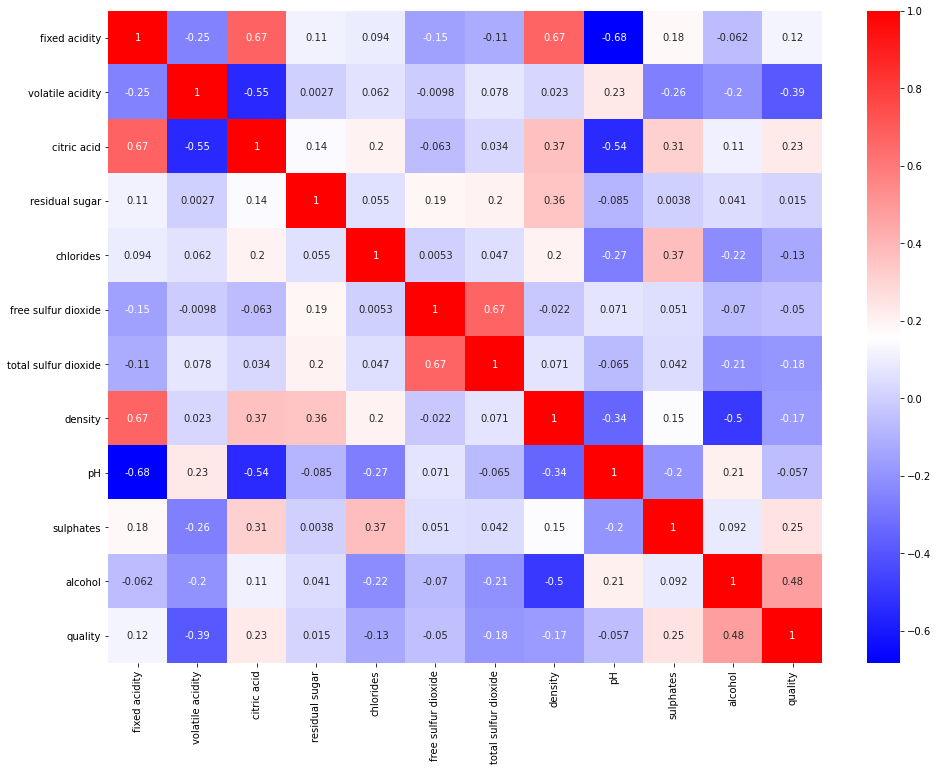

In [ ]:
# Creating a pictorial visualisation of the above correlation matrix
# using a heatmap helps in better understanding. 
# We can do that using Seaborn's Heatmap function.
plt.figure(figsize=(16,12))
sns.heatmap(red_wine_data.corr(), cmap='bwr', annot=True)

Pair Plot

The pair plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

It plots every numerical attribute against every other.

pairplot function of seaborn helps to achieve this

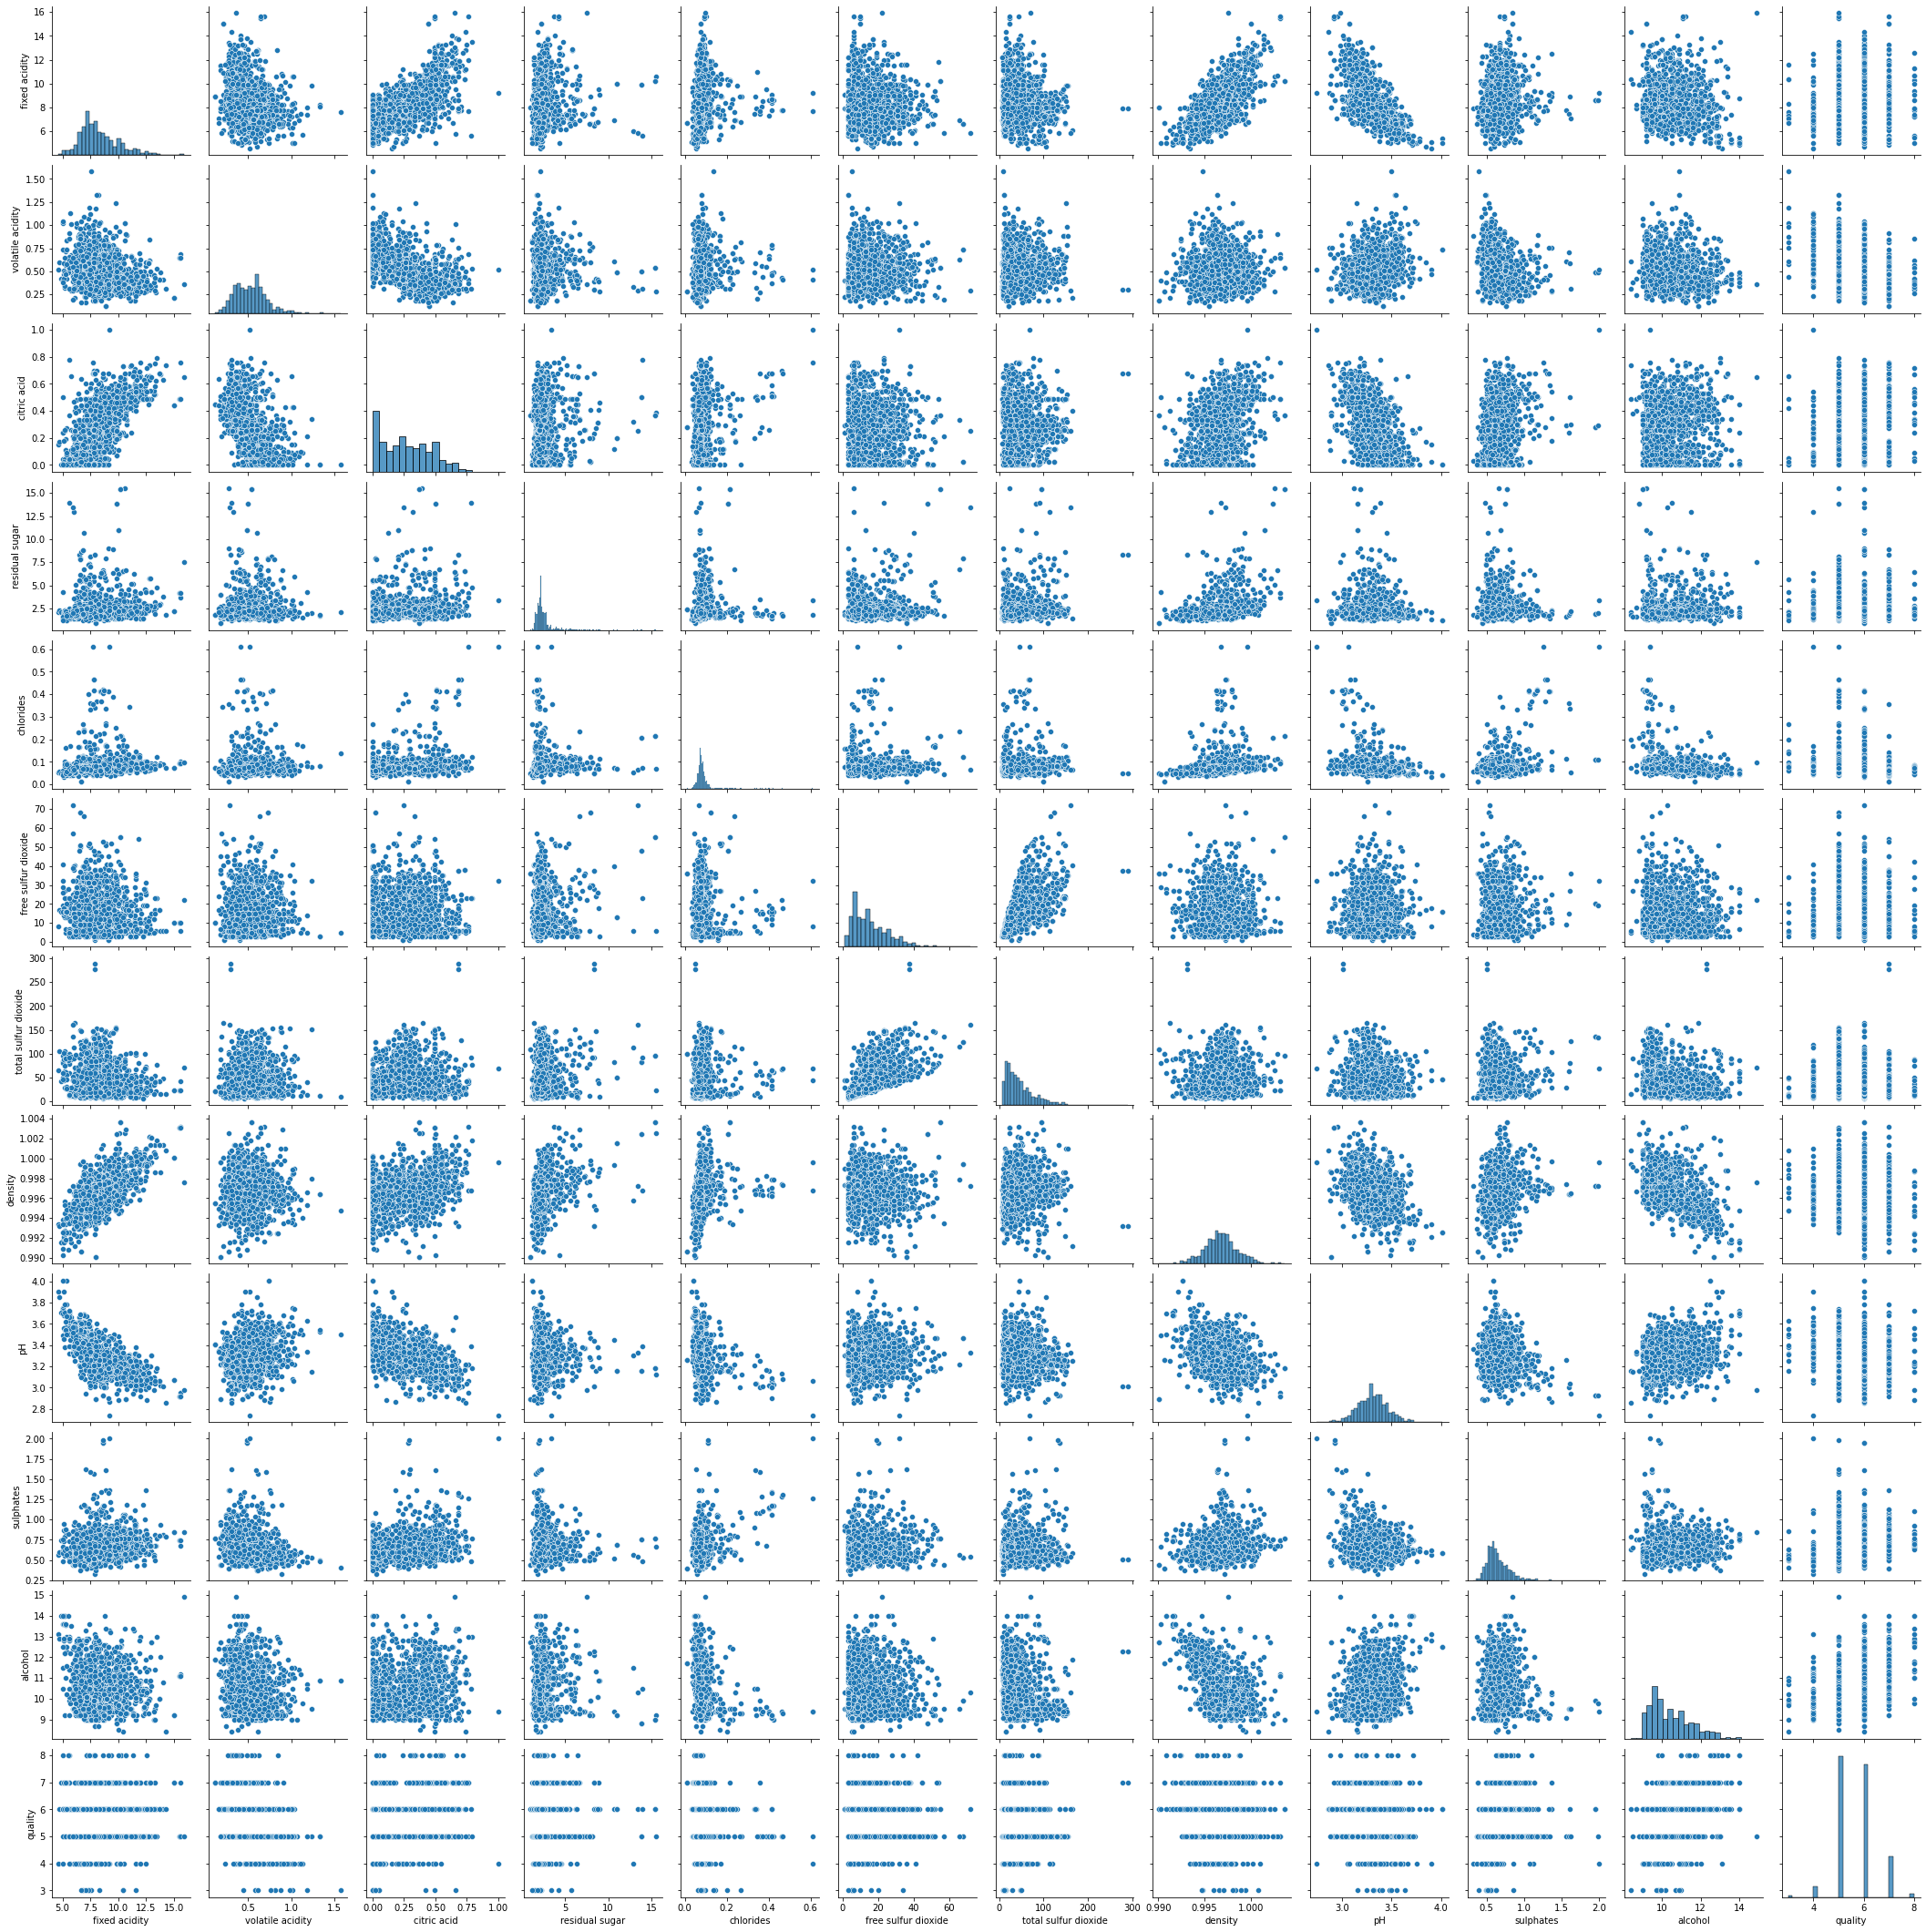

In [ ]:
sns.pairplot(red_wine_data)

Box Plot

A box plot is a great way to get a visual sense of an entire range of data. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Box plots divides data into its quartiles. The “box” shows a user the data set between the first and third quartiles.

The median gets drawn somewhere inside the box and then you see the most extreme non-outliers to finish the plot. Those lines are known as the “whiskers”. If there are any outliers then those can be plotted as well.

With box plots you can answer how diverse or uniform your data might be. You can identify what is normal and what is extreme. Box plots help give a shape to your data that is broad without sacrificing the ability to look at any piece and ask more questions.

It displays the five-number summary of a set of data. The five-number summary is:

1.minimum

2.first quartile (Q1)

3.median

4.third quartile (Q3)

5.maximum

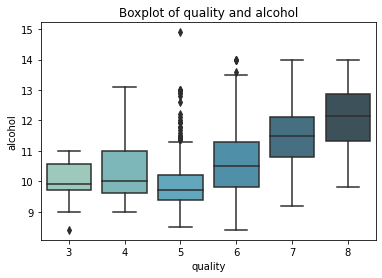

In [ ]:
sns.boxplot(y,red_wine_data['alcohol'],palette='GnBu_d')
plt.title("Boxplot of quality and alcohol")
plt.show()

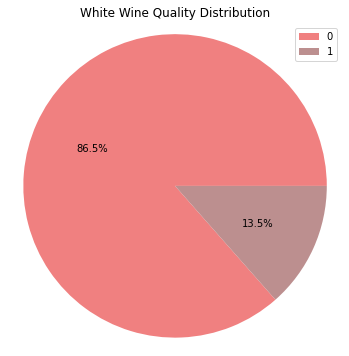

the amount of good quality of white wine is  13.5 %.
mean white wine quality is  5.635279347143754


In [ ]:
# grouping the wine based on grades
# defining 'grade' of a wine

# good wine
red_wine_data['grade'] = 1

#bad wine
red_wine_data.grade[red_wine_data.quality < 6.5] = 0

#sns.set(style = "Whitegrid")
#p = sns.countplot(data=red_wine_data, x='grade', pallete='muted')

# set plot size and color
plt.figure(figsize=(6,6))
colors = ['lightcoral', 'rosybrown']

labels = red_wine_data.grade.value_counts().index
plt.pie(red_wine_data.grade.value_counts(), autopct = '%1.1f%%', colors=colors)
plt.legend(labels, loc = "Best")
plt.axis('equal')
plt.title("White Wine Quality Distribution")
plt.show()
# show mean quality of white wine and quality distribution

print('the amount of good quality of white wine is ', round(red_wine_data.grade.value_counts(normalize=True)[1]*100,1), '%.')
print("mean white wine quality is ", red_wine_data["quality"].mean())

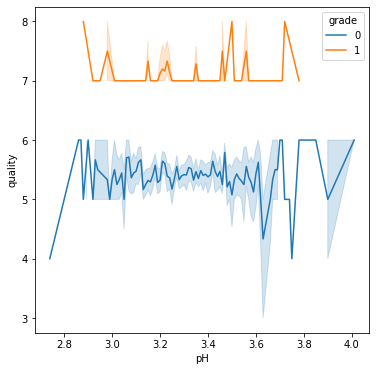

In [ ]:
# plot to see how pH is varying in the grade of white wine 
plt.figure(figsize=(6,6))
ax = sns.lineplot(x = "pH", y = "quality", hue = "grade", data = red_wine_data, markers = True)

In [ ]:
red_wine_data['grade'].value_counts() #prints counts of good and bad white wine

0    1378
1     215
Name: grade, dtype: int64

Now, Predicting White Wine Quality using:

Random Forest Classifier

Gaussian Naive Bayes Classifier

Decision Tree Classifier

KNeighbors Classifier

SVM Classifier

In [ ]:
# checking once more for columns names
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'grade'],
      dtype='object')

In [ ]:
# defining X and y 
X = red_wine_data.drop(['quality'], axis=1)
y = red_wine_data['quality']

In [ ]:
# creating dataset split for prediction 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 splits

# checking splits
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1274, 12)
y_train: (1274,)
X_test: (319, 12)
y_test: (319,)


In [ ]:
# 1. Using Random Forest Classifier

# Load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Random Forest Classifier Accuracy: 74.92163009404389 %


In [ ]:
#2. Gaussian Naive Bayes Classifier

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the Classifier/fitting the model
gnb.fit(X_train, y_train)

# predict the response
y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_test,y_test) * 100, 2)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Naive Bayes Accuracy: 71.15987460815047 %


In [ ]:
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10)

# Train the Classifier/fitting the model
clf = clf.fit(X_train,y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_dt = round(clf.score(X_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score 

# evaluate accuracy
print ("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")

Decision Tree Accuracy: 69.27899686520375 %


In [ ]:
#kNN
import sys, os

# Import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the Classifier/fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("kNN Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

kNN Accuracy: 52.03761755485894 %


In [ ]:
#Support Vector Machines trial
import sys, os

#Import svm model
from sklearn import svm
from sklearn.svm import SVC

#Create a svm Classifier
clf = SVC(C=1, kernel='rbf')

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_svm = round(clf.score(X_test,y_test) * 100, 2)

# evaluate accuracy
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

SVM Accuracy: 49.843260188087775 %


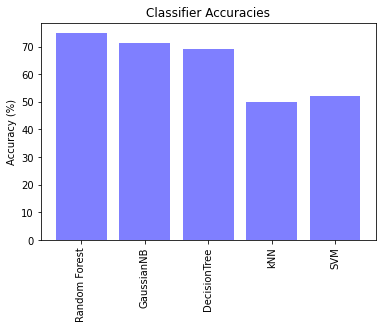

In [ ]:
# visualizing accuracies for all ML Algorithms using Matplotlib
predictors_group = ('Random Forest', 'GaussianNB', 'DecisionTree','kNN','SVM')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_rf, acc_gnb, acc_dt,acc_svm,acc_knn]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='blue')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

In [ ]:
#printing top three accuracies

print('Decision Tree:', acc_dt,'%')
print('Random Forest:', acc_rf,'%')
print('GaussianNB:',acc_gnb,'%')

Decision Tree: 69.28 %
Random Forest: 74.92 %
GaussianNB: 71.16 %


Reducing overfitting using Cross Validation for top three Algorithms -> RF, DT and GNB

In [ ]:
# importing the model for prediction

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# creating list of tuple with model and its name  
models = []
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GNB',GaussianNB()))

In [ ]:
# Import Cross Validation 
from sklearn.model_selection import cross_val_score

# simulate splitting a dataset of 1000 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X)
# print(kf)

acc = []   # All Algorithm/model accuracies
names = []    # All model name

for name, model in models:
    
    acc_of_model = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy') # kFolds =5 without shuffling
    
    acc.append(acc_of_model) # appending Accuray of different model to acc List
    
    names.append(name)# appending name of models
    Acc =name,round(acc_of_model.mean()*100,2) # printing Output 
    print(Acc)

('DT', 70.56)
('RF', 77.63)
('GNB', 66.56)


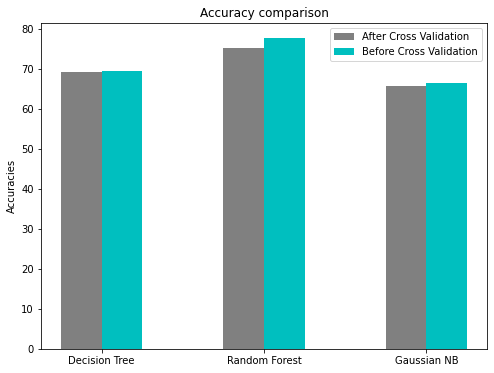

In [ ]:
# Plotting all accuracies together for comparison

labels = ['Decision Tree', 'Random Forest','Gaussian NB']

NoCV =[69.49 ,77.65,66.43] # accuracy before Cross Validation
CV=[69.24, 75.14, 65.8] # accuracy after Cross Validation

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

f, ax = plt.subplots(figsize=(8,6)) 
p1 = ax.bar(x - width/2, CV, width, label='After Cross Validation', color='grey')
p2 = ax.bar(x + width/2, NoCV, width, label='Before Cross Validation', color='c')

# Add some text for labels and title 
ax.set_ylabel('Accuracies')
ax.set_title('Accuracy comparison')
ax.set_xticks(x)
plt.xticks()
ax.set_xticklabels(labels)
ax.legend(loc='top right')
plt.show()

On comparison, the accuracies do not seem to drastically change, but do seem a bit reduced after cross validation which means that K-fold cross validation is giving a better approximation for those accuracies. From the bar plot, Random Forest appears to be providing the better accuracies followed by Decision Tree in predicting the white wine quality. Using this outcome, Random forest and Decision Tree can be applied to the dataset.